In [1]:
from math import log
import matplotlib.pyplot as plt
import re, glob, os
%matplotlib inline

# Baseline (assignment 1.2.1)

### Extracting all baseline files and running times

In [2]:
quick_times = []
heap_times = []
your_times = []
algorithms = [quick_times,heap_times,your_times]
names = ['Quicksort','Heapsort','Yoursort']

# change directory to search in /data/
os.chdir("/Users/baunbaun/Documents/computersystemer_BAUN/compsys/A3/src/data")

# extract baseline data
for file in glob.glob("*baseline*"):
    f = open(file,"r");
    # The regular expression below was inspired by the webpage: 
    # https://www.tutorialspoint.com/How-to-extract-numbers-from-a-string-in-Python
    numbers = [int(s) for s in re.findall(r'\d+\d*', f.read())]
    n = [int(s) for s in re.findall(r'\d+\d*', file)][0]
    
    # running time is the last number in numbers
    time = numbers[len(numbers)-1:][0]
    tupl = (n,time) 

    # put baseline data in the correct list
    if(re.search('quick',file)):
        quick_times.append(tupl)
    elif(re.search('heap',file)):
        heap_times.append(tupl)
    elif(re.search('your',file)):
        your_times.append(tupl)
        
    f.close() 

# sort lists by n and print the result
print("Baseline data: \n")
for i in range(3):
    algorithms[i] = sorted(algorithms[i], key=lambda tup: tup[0])
    print(names[i], "baseline:")
    for t in algorithms[i]:
        print(t, "\n")

Baseline data: 

Quicksort baseline:
(10, 1227) 

(100, 16146) 

(1000, 193237) 

(100000, 27708502) 

Heapsort baseline:
(10, 1242) 

(100, 20862) 

(1000, 296831) 

(100000, 49177406) 

Yoursort baseline:
(10, 148) 

(100, 1048) 

(1000, 10048) 

(100000, 1000048) 



### Plot baseline (running time in cycles per n-elements)

Quicksort [(10, 1227), (100, 16146), (1000, 193237), (100000, 27708502)]
Heapsort [(10, 1242), (100, 20862), (1000, 296831), (100000, 49177406)]
Yoursort [(10, 148), (100, 1048), (1000, 10048), (100000, 1000048)]


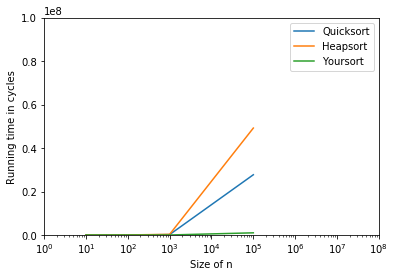

In [3]:
for i in range(3):
    algo = algorithms[i]
    name = names[i]
    print(name, algo)
    plt.plot(*zip(*algo), label=name)
    plt.legend()
    plt.xlabel('Size of n')
    plt.ylabel('Running time in cycles')
    plt.xscale('log')
    plt.xlim([1,1e8])
    plt.ylim([1,1e8])

### Plot baseline (running time in cycles per one element)
#### OBS, script may only be run once or the tuples are divided again and again

Quicksort [(10, 122.7), (100, 161.46), (1000, 193.237), (100000, 277.08502)]
Heapsort [(10, 124.2), (100, 208.62), (1000, 296.831), (100000, 491.77406)]
Yoursort [(10, 14.8), (100, 10.48), (1000, 10.048), (100000, 10.00048)]


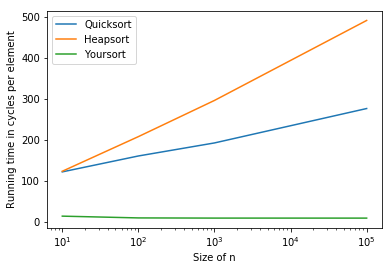

In [4]:
import matplotlib.pyplot as plt

# helper function
def div(algo):
    algo_copy = algo
    for i in range(len(algo)):
        tup = algo[i]
        algo_copy[i] = int(tup[0]),(tup[1]/tup[0])
    return algo_copy 

for i in range(3):
    algo = div(algorithms[i])
    name = names[i]
    print(name, algo)
    plt.plot(*zip(*algo), label=name)
    plt.legend()
    #plt.xlim([1,1e8])
    #plt.ylim([1,20])
    plt.xlabel('Size of n')
    plt.ylabel('Running time in cycles per element')
    plt.xscale('log')


# Delay (assignment 1.2.2)

In [5]:
# extracting all delay files and running times

# reset datastructure
quick_times[:] = []
heap_times[:] = []
your_times[:] = []

algorithms[:] = [quick_times,heap_times,your_times]
names[:] = ['Quicksort','Heapsort','Yoursort']

D_cache = 0
I_cache = 0
L1 = 0 # L1 is the sum of the D- and I-cache
L2 = 0

# change directory to search in /data/
os.chdir("/Users/baunbaun/Documents/computersystemer_BAUN/compsys/A3/src/data")

# extract 
for file in glob.glob("*memory*"):
    f = open(file,"r");
    # extract only digits
    numbers = [int(s) for s in re.findall(r'\d+\d*', f.read())]  
    n = [int(s) for s in re.findall(r'\d+\d*', file)][0]
    
    D_cache = numbers[21:22]
    I_cache = numbers[16:17]
    L1 = D_cache[0] + I_cache[0]
    L2 = numbers[11:12][0]
    
    cache_misses = (n,L1,L2) 

    if(re.search('quick',file)):
        quick_times.append(cache_misses)
    elif(re.search('heap',file)):
        heap_times.append(cache_misses)
    elif(re.search('your',file)):
        your_times.append(cache_misses)
        
    f.close() 
    
# sort lists by n

print("Delay data: \n")
for i in range(3):
    algorithms[i] = sorted(algorithms[i], key=lambda tup: tup[0])
    print(names[i], ": cache misses:")
    for t in algorithms[i]:
        print(t, "\n")



Delay data: 

Quicksort : cache misses:
(10, 31, 30) 

(100, 85, 84) 

(1000, 545, 543) 

(100000, 273302, 176034) 

Heapsort : cache misses:
(10, 32, 31) 

(100, 77, 76) 

(1000, 528, 526) 

(100000, 719393, 350460) 

Yoursort : cache misses:
(10, 16, 16) 

(100, 60, 60) 

(1000, 511, 510) 

(100000, 50012, 50012) 

